In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from read_data import ReadData
from combine_multiple_pollutants import CombineMultiplePollutants


pd.set_option('display.max_columns', 100)

In [31]:
pollutant = "PM2"
lag = "0-14"
state_code = "06"
filter_city_list = ["037", "111"]

covid_data = pd.read_csv("data/covid_data/covid_us_county.csv")
covid_data['date'] = pd.to_datetime(covid_data['date'], format="%Y-%m-%d", errors='coerce')

network_data = pd.read_csv("network_centralities/network_full_data_PM10.csv")
network_data['date'] = pd.to_datetime(network_data['date'], format="%d-%m-%Y", errors='coerce')

In [32]:
pollutants = ["PM2", "PM10"]
obj = CombineMultiplePollutants(pollutants,  year=2020, state_code="06", filter_city_list=["037", "111"],
                                lag="0-14")

pol_df = obj.combine_pollutants()


In [34]:
network_data.head(5)

,site_id_1,site_id_2,correlation,max_value_1,max_value_2,state_name_1,state_name_2,county_name_1,county_name_2,id,correlation_degree,correlation_betweenness,correlation_closeness,correlation_load,correlation_current_flow_betweenness,correlation_current_flow_closeness,correlation_communicability_betweeness,correlation_harmonic,correlation_clustering,euclidian_simlarity_degree,euclidian_simlarity_betweenness,euclidian_simlarity_closeness,euclidian_simlarity_load,euclidian_simlarity_current_flow_betweenness,euclidian_simlarity_current_flow_closeness,euclidian_simlarity_communicability_betweeness,euclidian_simlarity_harmonic,euclidian_simlarity_clustering,dtw_simlarity_degree,dtw_simlarity_betweenness,dtw_simlarity_closeness,dtw_simlarity_load,dtw_simlarity_current_flow_betweenness,dtw_simlarity_current_flow_closeness,dtw_simlarity_communicability_betweeness,dtw_simlarity_harmonic,dtw_simlarity_clustering,cdtw_degree,cdtw_betweenness,cdtw_closeness,cdtw_load,cdtw_current_flow_betweenness,cdtw_current_flow_closeness,cdtw_communicability_betweeness,cdtw_harmonic,cdtw_clustering,date
0,06_037_9033,15_003_1001,-0.154381,63.0,35.0,California,Hawaii,Los Angeles,Honolulu,06_037_9033,0.663636,0.338160,0.718954,0.338160,0.400319,0.024557,0.979472,271.5,0.000070,1.000000,0.019186,1.000000,0.014612,0.256593,0.293751,0.996271,366.0,0.000693,1.0,0.002949,1.0,0.002949,0.254496,0.294285,0.996350,366.0,0.000709,1.0,0.048499,1.0,0.048499,0.321789,0.084072,0.996331,366.0,0.000253,2020-01-22
1,06_037_0016,15_003_1001,0.023661,74.0,35.0,California,Hawaii,Los Angeles,Honolulu,06_037_0016,0.745455,0.356765,0.797101,0.356765,0.530779,0.024561,0.993058,288.0,0.000060,1.000000,0.090302,1.000000,0.089595,0.257681,0.293751,0.996368,366.0,0.000718,1.0,0.092997,1.0,0.092866,0.255753,0.294286,0.996350,366.0,0.000734,1.0,0.286930,1.0,0.286930,0.321384,0.084053,0.996331,366.0,0.000250,2020-01-22
2,06_111_2002,15_003_1001,0.530890,39.0,35.0,California,Hawaii,Ventura,Honolulu,06_111_2002,0.487879,0.563673,0.606618,0.563673,0.315346,0.024441,0.810608,238.0,0.000020,0.994536,0.000000,0.994565,0.000000,0.250193,0.293729,0.996235,365.0,0.000678,1.0,0.104166,1.0,0.099244,0.250312,0.294262,0.996253,366.0,0.000684,1.0,0.373868,1.0,0.373868,0.253849,0.083949,0.996331,366.0,0.000233,2020-01-22
3,06_111_3001,15_003_1001,-0.054605,115.0,35.0,California,Hawaii,Ventura,Honolulu,06_111_3001,0.587879,0.433343,0.681818,0.433343,0.422688,0.024531,0.933082,259.0,0.000050,0.994536,0.886496,0.994565,0.882895,0.249713,0.293716,0.996135,365.0,0.000674,1.0,0.795808,1.0,0.792327,0.248047,0.294254,0.996253,366.0,0.000683,1.0,0.302201,1.0,0.302201,0.240363,0.083941,0.996331,366.0,0.000226,2020-01-22
4,06_037_0016,12_115_1006,0.209877,74.0,76.0,California,Florida,Los Angeles,Sarasota,06_037_0016,0.744681,0.545203,0.796610,0.545203,0.520207,0.026771,0.992600,287.0,0.000061,1.000000,0.085235,1.000000,0.084900,0.257695,0.297919,0.996393,367.0,0.000720,1.0,0.085719,1.0,0.085719,0.255534,0.296777,0.996375,367.0,0.000736,1.0,0.263695,1.0,0.263695,0.315240,0.084987,0.996356,367.0,0.000258,2020-01-23


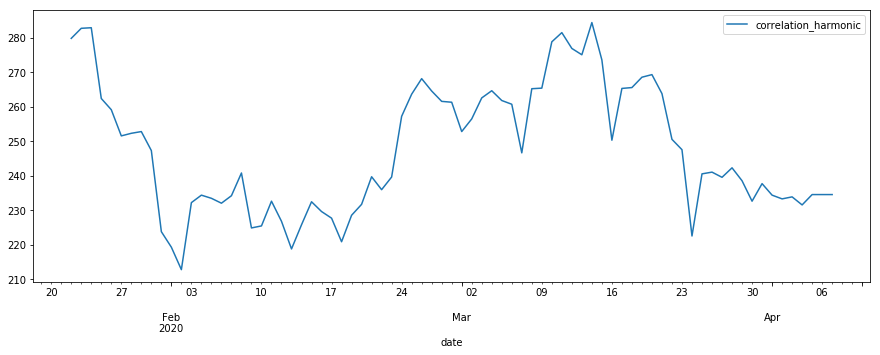

In [55]:
network_data = network_data.groupby(['date', 'county_name_1']).agg(agg).reset_index()

plt.close()
fig, ax = plt.subplots(figsize=(15, 5))
network_data[network_data['county_name_1']=='Los Angeles'].plot('date', 'correlation_harmonic', kind='line', ax =ax)
# network_data[network_data['county_name_1']=='Los Angeles'].plot('date', 'correlation_current_flow_closeness', kind='line', ax =ax)
# network_data[network_data['county_name_1']=='Los Angeles'].plot('date', 'correlation_communicability_betweeness', kind='line', ax =ax)

plt.show()

In [50]:
import numpy as np
la = network_data[network_data['county_name_1']=='Los Angeles']

def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)

data = {}
index=list(range(la.shape[0]))
for i in la.columns:
    try:
        List=la[i].tolist()
        resultent=trendline(index,List)
        data[i] = resultent
    except:
        pass

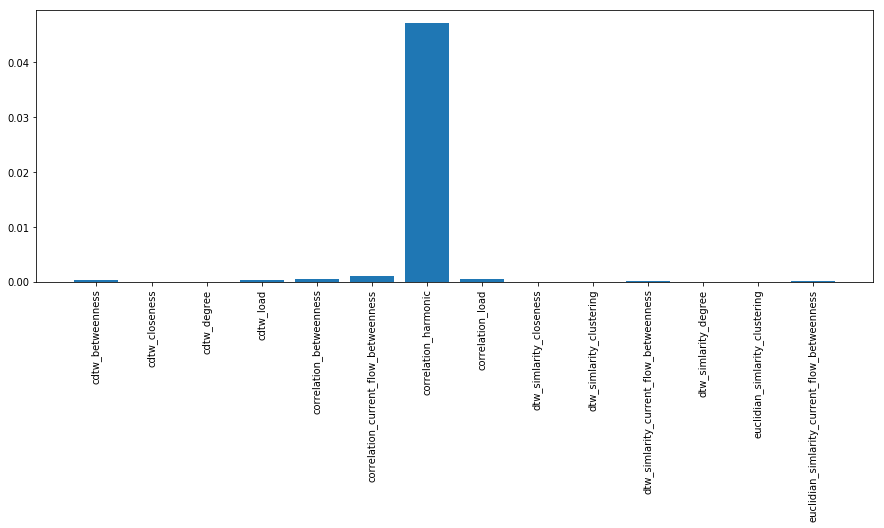

In [54]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 5))
a = [i for i in data if data[i]>=0]
x = range(len(a))
plt.bar(x, [data[i] for i in a])
plt.xticks(x, a, rotation=90)
plt.show()

In [22]:
network_data.head(2)

,site_id_1,site_id_2,correlation,max_value_1,max_value_2,state_name_1,state_name_2,county_name_1,county_name_2,id,correlation_degree,correlation_betweenness,correlation_closeness,correlation_load,correlation_current_flow_betweenness,correlation_current_flow_closeness,correlation_communicability_betweeness,correlation_harmonic,correlation_clustering,euclidian_simlarity_degree,euclidian_simlarity_betweenness,euclidian_simlarity_closeness,euclidian_simlarity_load,euclidian_simlarity_current_flow_betweenness,euclidian_simlarity_current_flow_closeness,euclidian_simlarity_communicability_betweeness,euclidian_simlarity_harmonic,euclidian_simlarity_clustering,dtw_simlarity_degree,dtw_simlarity_betweenness,dtw_simlarity_closeness,dtw_simlarity_load,dtw_simlarity_current_flow_betweenness,dtw_simlarity_current_flow_closeness,dtw_simlarity_communicability_betweeness,dtw_simlarity_harmonic,dtw_simlarity_clustering,cdtw_degree,cdtw_betweenness,cdtw_closeness,cdtw_load,cdtw_current_flow_betweenness,cdtw_current_flow_closeness,cdtw_communicability_betweeness,cdtw_harmonic,cdtw_clustering,date
0,06_037_4008,40_031_0651,0.776355,44.0,18.2,California,Oklahoma,Los Angeles,Comanche,06_037_4008,0.580972,0.077794,0.645752,0.077794,0.154686,0.012618,0.963825,379.833333,0.005798,0.990020,0.076894,0.990119,0.076894,0.099088,0.187921,0.982937,498.5,0.009864,1.0,0.000790,1.0,0.000790,0.102423,0.178497,0.983726,501.0,0.012951,1.0,0.013533,1.0,0.013533,0.118155,0.064079,0.983715,501.0,0.008080,2020-01-22
1,06_037_4004,40_031_0651,0.794635,39.0,18.2,California,Oklahoma,Los Angeles,Comanche,06_037_4004,0.566802,0.057370,0.639896,0.057370,0.140584,0.012616,0.963501,376.333333,0.005957,0.996008,0.019361,0.996024,0.019361,0.099679,0.187924,0.983550,500.0,0.009442,1.0,0.017501,1.0,0.017501,0.102843,0.178492,0.983726,501.0,0.012560,1.0,0.011860,1.0,0.011860,0.108064,0.063984,0.983715,501.0,0.007564,2020-01-22


In [23]:
agg = {'cdtw_betweenness': 'median',
 'cdtw_closeness': 'median',
 'cdtw_clustering': 'median',
 'cdtw_communicability_betweeness': 'median',
 'cdtw_current_flow_betweenness': 'median',
 'cdtw_current_flow_closeness': 'median',
 'cdtw_degree': 'median',
 'cdtw_harmonic': 'median',
 'cdtw_load': 'median',
 'correlation': 'median',
 'correlation_betweenness': 'median',
 'correlation_closeness': 'median',
 'correlation_clustering': 'median',
 'correlation_communicability_betweeness': 'median',
 'correlation_current_flow_betweenness': 'median',
 'correlation_current_flow_closeness': 'median',
 'correlation_degree': 'median',
 'correlation_harmonic': 'median',
 'correlation_load': 'median',
 'county_name_2': 'first',
 'dtw_simlarity_betweenness': 'median',
 'dtw_simlarity_closeness': 'median',
 'dtw_simlarity_clustering': 'median',
 'dtw_simlarity_communicability_betweeness': 'median',
 'dtw_simlarity_current_flow_betweenness': 'median',
 'dtw_simlarity_current_flow_closeness': 'median',
 'dtw_simlarity_degree': 'median',
 'dtw_simlarity_harmonic': 'median',
 'dtw_simlarity_load': 'median',
 'euclidian_simlarity_betweenness': 'median',
 'euclidian_simlarity_closeness': 'median',
 'euclidian_simlarity_clustering': 'median',
 'euclidian_simlarity_communicability_betweeness': 'median',
 'euclidian_simlarity_current_flow_betweenness': 'median',
 'euclidian_simlarity_current_flow_closeness': 'median',
 'euclidian_simlarity_degree': 'median',
 'euclidian_simlarity_harmonic': 'median',
 'euclidian_simlarity_load': 'median',
 'id': 'first',
 'max_value_1': 'first',
 'max_value_2': 'first',
 'site_id_1': 'first',
 'site_id_2': 'first',
 'state_name_1': 'first',
 'state_name_2': 'first'}

In [24]:
tdf = network_data.groupby(['date', 'county_name_1']).agg(agg).reset_index()
tdf = tdf.sort_values(by='date')

In [25]:
tdf.columns

Index(['date', 'county_name_1', 'cdtw_betweenness', 'cdtw_closeness',
       'cdtw_clustering', 'cdtw_communicability_betweeness',
       'cdtw_current_flow_betweenness', 'cdtw_current_flow_closeness',
       'cdtw_degree', 'cdtw_harmonic', 'cdtw_load', 'correlation',
       'correlation_betweenness', 'correlation_closeness',
       'correlation_clustering', 'correlation_communicability_betweeness',
       'correlation_current_flow_betweenness',
       'correlation_current_flow_closeness', 'correlation_degree',
       'correlation_harmonic', 'correlation_load', 'county_name_2',
       'dtw_simlarity_betweenness', 'dtw_simlarity_closeness',
       'dtw_simlarity_clustering', 'dtw_simlarity_communicability_betweeness',
       'dtw_simlarity_current_flow_betweenness',
       'dtw_simlarity_current_flow_closeness', 'dtw_simlarity_degree',
       'dtw_simlarity_harmonic', 'dtw_simlarity_load',
       'euclidian_simlarity_betweenness', 'euclidian_simlarity_closeness',
       'euclidian_simla

In [26]:
tdf['county'] = tdf['county_name_1']
to_remove = [ 'site_id_1', 'site_id_2', 'state_name_1', 'state_name_2', 'max_value_2', 'id', 'county_name_1']
tdf.drop(to_remove, axis=1, inplace=True)

In [27]:
tdf

,date,cdtw_betweenness,cdtw_closeness,cdtw_clustering,cdtw_communicability_betweeness,cdtw_current_flow_betweenness,cdtw_current_flow_closeness,cdtw_degree,cdtw_harmonic,cdtw_load,correlation,correlation_betweenness,correlation_closeness,correlation_clustering,correlation_communicability_betweeness,correlation_current_flow_betweenness,correlation_current_flow_closeness,correlation_degree,correlation_harmonic,correlation_load,county_name_2,dtw_simlarity_betweenness,dtw_simlarity_closeness,dtw_simlarity_clustering,dtw_simlarity_communicability_betweeness,dtw_simlarity_current_flow_betweenness,dtw_simlarity_current_flow_closeness,dtw_simlarity_degree,dtw_simlarity_harmonic,dtw_simlarity_load,euclidian_simlarity_betweenness,euclidian_simlarity_closeness,euclidian_simlarity_clustering,euclidian_simlarity_communicability_betweeness,euclidian_simlarity_current_flow_betweenness,euclidian_simlarity_current_flow_closeness,euclidian_simlarity_degree,euclidian_simlarity_harmonic,euclidian_simlarity_load,max_value_1
0,2020-01-22,0.023681,1.0,0.007564,0.983715,0.108064,0.063984,1.0,501.0,0.023681,0.745881,0.079231,0.641558,0.005802,0.963544,0.140584,0.012615,0.570850,377.333333,0.079231,Comanche,0.001110,1.0,0.012560,0.983726,0.102843,0.178497,1.0,501.0,0.001110,0.019361,0.996024,0.009442,0.983550,0.099679,0.187924,0.996008,500.0,0.019361,44.0
1,2020-01-22,0.022958,1.0,0.007990,0.983715,0.107179,0.063961,1.0,501.0,0.022958,0.328943,0.219330,0.623737,0.004212,0.937254,0.180290,0.012602,0.542510,375.000000,0.219330,Comanche,0.038307,1.0,0.011222,0.983726,0.103462,0.178429,1.0,501.0,0.036311,0.022774,1.000000,0.008648,0.983584,0.102424,0.187949,1.000000,501.0,0.022778,23.0
2,2020-01-23,0.021242,1.0,0.007481,0.983655,0.109519,0.066184,1.0,500.0,0.021242,0.110479,0.096887,0.645204,0.005487,0.962317,0.146843,0.012859,0.582485,377.666667,0.096887,Phillips,0.001587,1.0,0.012844,0.983666,0.103274,0.187867,1.0,500.0,0.001587,0.025990,0.994036,0.009533,0.983329,0.099700,0.199271,0.994000,498.5,0.025984,42.7
3,2020-01-23,0.068397,1.0,0.007541,0.983655,0.097503,0.066027,1.0,500.0,0.068397,-0.134070,0.215088,0.649471,0.004167,0.938280,0.169770,0.012844,0.543788,373.833333,0.215088,Phillips,0.047992,1.0,0.011857,0.983666,0.102209,0.187731,1.0,500.0,0.048112,0.043693,1.000000,0.008925,0.983500,0.103416,0.199316,1.000000,500.0,0.043695,38.0
4,2020-01-24,0.023520,1.0,0.007475,0.983475,0.108021,0.068174,1.0,497.0,0.023520,-0.312910,0.106317,0.683616,0.005016,0.966719,0.168871,0.014196,0.590909,381.166667,0.106317,Clarke,0.004115,1.0,0.012028,0.983486,0.103812,0.187756,1.0,497.0,0.004211,0.025104,1.000000,0.009555,0.983497,0.100468,0.204795,1.000000,497.0,0.025033,25.0
5,2020-01-24,0.056661,1.0,0.007579,0.983475,0.098240,0.068060,1.0,497.0,0.056661,-0.028808,0.243297,0.647925,0.003860,0.940135,0.168750,0.014177,0.555785,368.500000,0.243297,Clarke,0.009896,1.0,0.011152,0.983486,0.104994,0.187725,1.0,497.0,0.009391,0.035374,1.000000,0.008980,0.983497,0.102707,0.204814,1.000000,497.0,0.033329,23.0
6,2020-01-25,0.024068,1.0,0.007397,0.983475,0.115760,0.068817,1.0,497.0,0.024068,0.287114,0.147699,0.665689,0.003565,0.958092,0.174953,0.013061,0.550661,348.000000,0.147699,Bowie,0.007675,1.0,0.007412,0.983486,0.102385,0.185020,1.0,497.0,0.007675,0.014940,1.000000,0.009642,0.983486,0.098844,0.201947,1.000000,497.0,0.014945,25.0
7,2020-01-25,0.074320,1.0,0.007450,0.983475,0.094555,0.068577,1.0,497.0,0.074320,0.294347,0.175774,0.625344,0.002801,0.886237,0.156588,0.013049,0.453744,326.000000,0.175774,Bowie,0.011975,1.0,0.006943,0.983486,0.106506,0.185049,1.0,497.0,0.011975,0.020052,1.000000,0.009151,0.983486,0.102844,0.202009,1.000000,497.0,0.018036,30.0
8,2020-01-26,0.016308,1.0,0.007852,0.983475,0.128298,0.073352,1.0,497.0,0.016308,0.736165,0.122321,0.635174,0.005203,0.949671,0.173047,0.010870,0.530892,326.833333,0.122321,Dorchester,0.017800,1.0,0.007831,0.983486,0.101158,0.186366,1.0,497.0,0.017800,0.007115,1.000000,0.009686,0.983497,0.099845,0.199501,1.000000,497.0,0.0

In [10]:
key = 'correlation'

similarity_mat = [i for i in tdf.columns if key in i]
tdf['county'] = tdf['county_name_1']
headers = ['date', 'county']+similarity_mat

df = tdf

In [11]:
df = df.reset_index()

In [12]:
df = df.merge(covid_data[['date', 'county', 'cases', 'deaths']], on=("date", "county"))
df = pol_df.merge(df, on=("date", "county"))

In [13]:
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear

In [14]:
df.drop(['date','county', 'index', 'correlation'], axis=1, inplace=True)

In [15]:
df

,PM2,PM10,county_name_1,cdtw_betweenness,cdtw_closeness,cdtw_clustering,cdtw_communicability_betweeness,cdtw_current_flow_betweenness,cdtw_current_flow_closeness,cdtw_degree,cdtw_harmonic,cdtw_load,correlation_betweenness,correlation_closeness,correlation_clustering,correlation_communicability_betweeness,correlation_current_flow_betweenness,correlation_current_flow_closeness,correlation_degree,correlation_harmonic,correlation_load,county_name_2,dtw_simlarity_betweenness,dtw_simlarity_closeness,dtw_simlarity_clustering,dtw_simlarity_communicability_betweeness,dtw_simlarity_current_flow_betweenness,dtw_simlarity_current_flow_closeness,dtw_simlarity_degree,dtw_simlarity_harmonic,dtw_simlarity_load,euclidian_simlarity_betweenness,euclidian_simlarity_closeness,euclidian_simlarity_clustering,euclidian_simlarity_communicability_betweeness,euclidian_simlarity_current_flow_betweenness,euclidian_simlarity_current_flow_closeness,euclidian_simlarity_degree,euclidian_simlarity_harmonic,euclidian_simlarity_load,max_value_1,cases,deaths,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,22.442857,43.642857,Los Angeles,0.023681,1.0,0.007564,0.983715,0.108064,0.063984,1.0,501.0,0.023681,0.079231,0.641558,0.005802,0.963544,0.140584,0.012615,0.570850,377.333333,0.079231,Comanche,0.001110,1.0,0.012560,0.983726,0.102843,0.178497,1.0,501.0,0.001110,0.019361,0.996024,0.009442,0.983550,0.099679,0.187924,0.996008,500.0,0.019361,44.0,0,0,2,1,1,2020,22,22,4
1,24.571429,35.142857,Ventura,0.022958,1.0,0.007990,0.983715,0.107179,0.063961,1.0,501.0,0.022958,0.219330,0.623737,0.004212,0.937254,0.180290,0.012602,0.542510,375.000000,0.219330,Comanche,0.038307,1.0,0.011222,0.983726,0.103462,0.178429,1.0,501.0,0.036311,0.022774,1.000000,0.008648,0.983584,0.102424,0.187949,1.000000,501.0,0.022778,23.0,0,0,2,1,1,2020,22,22,4
2,22.707143,44.785714,Los Angeles,0.021242,1.0,0.007481,0.983655,0.109519,0.066184,1.0,500.0,0.021242,0.096887,0.645204,0.005487,0.962317,0.146843,0.012859,0.582485,377.666667,0.096887,Phillips,0.001587,1.0,0.012844,0.983666,0.103274,0.187867,1.0,500.0,0.001587,0.025990,0.994036,0.009533,0.983329,0.099700,0.199271,0.994000,498.5,0.025984,42.7,0,0,3,1,1,2020,23,23,4
3,22.714286,35.214286,Ventura,0.068397,1.0,0.007541,0.983655,0.097503,0.066027,1.0,500.0,0.068397,0.215088,0.649471,0.004167,0.938280,0.169770,0.012844,0.543788,373.833333,0.215088,Phillips,0.047992,1.0,0.011857,0.983666,0.102209,0.187731,1.0,500.0,0.048112,0.043693,1.000000,0.008925,0.983500,0.103416,0.199316,1.000000,500.0,0.043695,38.0,0,0,3,1,1,2020,23,23,4
4,22.792857,43.785714,Los Angeles,0.023520,1.0,0.007475,0.983475,0.108021,0.068174,1.0,497.0,0.023520,0.106317,0.683616,0.005016,0.966719,0.168871,0.014196,0.590909,381.166667,0.106317,Clarke,0.004115,1.0,0.012028,0.983486,0.103812,0.187756,1.0,497.0,0.004211,0.025104,1.000000,0.009555,0.983497,0.100468,0.204795,1.000000,497.0,0.025033,25.0,0,0,4,1,1,2020,24,24,4
5,22.214286,28.928571,Ventura,0.056661,1.0,0.007579,0.983475,0.098240,0.068060,1.0,497.0,0.056661,0.243297,0.647925,0.003860,0.940135,0.168750,0.014177,0.555785,368.500000,0.243297,Clarke,0.009896,1.0,0.011152,0.983486,0.104994,0.187725,1.0,497.0,0.009391,0.035374,1.000000,0.008980,0.983497,0.102707,0.204814,1.000000,497.0,0.033329,23.0,0,0,4,1,1,2020,24,24,4
6,23.414286,44.428571,Los Angeles,0.024068,1.0,0.007397,0.983475,0.115760,0.068817,1.0,497.0,0.024068,0.147699,0.665689,0.003565,0.958092,0.174953,0.013061,0.550661,348.000000,0.147699,Bowie,0.007675,1.0,0.007412,0.983486,0.102385,0.185020,1.0,497.0,0.007675,0.014940,1.000000,0.009642,0.983486,0.098844,0.201947,1.000000,497.0,0.014945,25.0,0,0,5,1,1,2020,25,25,4
7,22.857143,29.285714,Ventura,0.074320,1.0,0.007450,0.983475,0.094555,0.068577,1.0,497.0,0.074320,0.175774,0.625344,0.002801,0.886237,0.156588,0.013049,0.453744,326.000000,0.175774,Bowie,0.011975,1.0,0.006943,0.983486,0.106506,0.185049,1.0,497.0,0.011975,0.020052,1.000000,0.009151,0.983486,0.102844,0.202009,1.000000,497.0,0.018036,30.0,0,0,5,

In [16]:
df.to_csv("data/network_analysis_final_file.csv", index=False)